In [71]:
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA

In [72]:
# Data Loading
photos_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/photos.csv', sep=',', encoding='latin-1',low_memory=False)
ratings_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/ratings.csv', sep=',', encoding='latin-1',low_memory=False)
surveys_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/surveys.csv', sep=',', encoding='latin-1',low_memory=False)
annotations_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/annotations.csv', sep=',', encoding='latin-1',low_memory=False)

In [73]:
#Go fetch the train and test
testset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/testset.csv')
trainset = pd.read_csv('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/csvs/trainset.csv')

# Converter de volta para lista de tuplas
testset = [tuple(row) for row in testset.to_numpy()]
trainset = [tuple(row) for row in trainset.to_numpy()]

# Exibir os dados carregados
print(testset)
print(trainset)

[(1, 1738, 1), (1, 318, 0), (1, 1055, 1), (2, 40, 1), (2, 1898, 0), (2, 544, 1), (3, 675, 1), (3, 235, 0), (3, 1295, 1), (4, 2901, 1), (4, 1250, 0), (4, 1082, 1), (5, 1717, 1), (5, 2717, 1), (5, 2897, 1), (6, 1251, 1), (6, 2143, 1), (6, 546, 1), (7, 429, 1), (7, 2877, 0), (7, 2195, 1), (8, 38, 1), (8, 2516, 0), (8, 1925, 0), (9, 1839, 1), (9, 2677, 0), (9, 1543, 1), (10, 2738, 1), (10, 3059, 0), (10, 2892, 1), (11, 1255, 1), (11, 2002, 0), (11, 1612, 0), (12, 1235, 1), (12, 2876, 0), (12, 2099, 1), (13, 2474, 1), (13, 2684, 0), (13, 155, 0), (14, 2533, 1), (14, 857, 0), (14, 2736, 0), (15, 1312, 1), (15, 2390, 0), (15, 407, 1), (16, 215, 1), (16, 1335, 0), (16, 205, 1), (17, 530, 1), (17, 3057, 0), (17, 791, 1), (18, 1737, 1), (18, 954, 0), (18, 1156, 1), (19, 980, 1), (19, 98, 1), (19, 3004, 1), (20, 1429, 1), (20, 1861, 0), (20, 567, 1), (21, 584, 1), (21, 853, 0), (21, 2792, 1), (22, 1428, 1), (22, 365, 0), (22, 724, 1), (23, 634, 1), (23, 534, 0), (23, 1315, 1), (24, 1683, 1), (24,

In [74]:
df_random_items_per_user = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user.json')
json_path = 'C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/random_items_per_user.json'
with open(json_path, 'r') as file:
    random_items_dict = json.load(file)

random_items_dict = {int(key): value for key, value in random_items_dict.items()}
random_items_dict

{1: [998,
  2561,
  561,
  218,
  2077,
  2153,
  2528,
  1321,
  1029,
  1626,
  2861,
  224,
  2297,
  2721,
  460,
  1760,
  186,
  1335,
  2409,
  796],
 2: [1719,
  51,
  2174,
  943,
  592,
  1263,
  1907,
  2896,
  2589,
  1399,
  3014,
  2421,
  918,
  2327,
  2248,
  1373,
  2478,
  2085,
  986,
  540],
 3: [2236,
  2524,
  1533,
  85,
  2198,
  1687,
  1199,
  1182,
  1834,
  1272,
  1034,
  1530,
  2148,
  1337,
  440,
  1234,
  2135,
  19,
  2396,
  2006],
 4: [1839,
  1657,
  1690,
  1969,
  837,
  2329,
  1825,
  363,
  1036,
  1642,
  1798,
  2229,
  905,
  178,
  2797,
  2482,
  1341,
  555,
  2765,
  365],
 5: [3050,
  2232,
  893,
  2482,
  2315,
  1979,
  421,
  1716,
  3063,
  1023,
  1340,
  2074,
  1703,
  1209,
  2658,
  1246,
  2297,
  2366,
  2951,
  3075],
 6: [2566,
  1305,
  243,
  697,
  1820,
  1459,
  909,
  2928,
  3045,
  2526,
  2205,
  1432,
  1208,
  462,
  1395,
  1415,
  161,
  1919,
  665,
  1130],
 7: [2649,
  2357,
  1263,
  1476,
  1199,
  1342

In [75]:
df_embeddings_vgg16 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_vgg16.json',orient='records', lines=True)
df_embeddings_vgg19 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_vgg19.json',orient='records', lines=True)
df_embeddings_resnet50 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet50.json', orient='records', lines=True)
df_embeddings_resnet50v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet50v2.json', orient='records', lines=True)
df_embeddings_resnet101 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet101.json', orient='records', lines=True)
df_embeddings_resnet101v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet101v2.json', orient='records', lines=True)
df_embeddings_resnet152 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152v2 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_resnet152v2.json', orient='records', lines=True)
df_embeddings_inceptionv3 = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_incepitonv3.json', orient='records', lines=True)
df_embeddings_xception = pd.read_json('C:/Users/lmir/Desktop/Tese/EmoRecSys/data/jsons/df_embeddings_xception.json', orient='records', lines=True)

In [76]:
embeddings_list_vgg16 = df_embeddings_vgg16['embedding'].tolist()
embeddings_list_vgg19 = df_embeddings_vgg19['embedding'].tolist()
embeddings_list_restnet50 = df_embeddings_resnet50['embedding'].tolist()
embeddings_list_restnet50v2 = df_embeddings_resnet50v2['embedding'].tolist()
embeddings_list_restnet101 = df_embeddings_resnet101['embedding'].tolist()
embeddings_list_restnet101v2 = df_embeddings_resnet101v2['embedding'].tolist()
embeddings_list_restnet152 = df_embeddings_resnet152['embedding'].tolist()
embeddings_list_restnet152v2 = df_embeddings_resnet152v2['embedding'].tolist()
embeddings_list_inceptionv3 = df_embeddings_inceptionv3['embedding'].tolist()
embeddings_list_xception = df_embeddings_xception['embedding'].tolist()

# Crie um DataFrame onde cada vetor de embedding é uma lista em uma única coluna
df_embeddings_vgg16_1 = pd.DataFrame({'embedding': embeddings_list_vgg16})
df_embeddings_vgg19_1 = pd.DataFrame({'embedding': embeddings_list_vgg19})
df_embeddings_resnet50_1 = pd.DataFrame({'embedding': embeddings_list_restnet50})
df_embeddings_resnet50v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet50v2})
df_embeddings_resnet101_1 = pd.DataFrame({'embedding': embeddings_list_restnet101})
df_embeddings_resnet101v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet101v2})
df_embeddings_resnet152_1 = pd.DataFrame({'embedding': embeddings_list_restnet152})
df_embeddings_resnet152v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet152v2})
df_embeddings_inceptionv3_1 = pd.DataFrame({'embedding': embeddings_list_inceptionv3})
df_embeddings_xception_1 = pd.DataFrame({'embedding': embeddings_list_xception})


df_embeddings_vgg16_1['id'] = df_embeddings_vgg16['id'].values
df_embeddings_vgg19_1['id'] = df_embeddings_vgg19['id'].values
df_embeddings_resnet50_1['id'] = df_embeddings_resnet50['id'].values
df_embeddings_resnet50v2_1['id'] = df_embeddings_resnet50v2['id'].values
df_embeddings_resnet101_1['id'] = df_embeddings_resnet101['id'].values
df_embeddings_resnet101v2_1['id'] = df_embeddings_resnet101v2['id'].values
df_embeddings_resnet152_1['id'] = df_embeddings_resnet152['id'].values
df_embeddings_resnet152v2_1['id'] = df_embeddings_resnet152v2['id'].values
df_embeddings_inceptionv3_1['id'] = df_embeddings_inceptionv3['id'].values
df_embeddings_xception_1['id'] = df_embeddings_xception['id'].values

# Verifique o resultado
print(df_embeddings_vgg16_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_vgg16_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_vgg19_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_vgg19_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_inceptionv3_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_inceptionv3_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_xception_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_xception_1.head())  # Mostra as primeiras linhas do DataFrame

type(df_embeddings_resnet50_1['embedding'][0])
type(df_embeddings_resnet50v2_1['embedding'][0])
type(df_embeddings_resnet101_1['embedding'][0])
type(df_embeddings_resnet101v2_1['embedding'][0])
type(df_embeddings_resnet152_1['embedding'][0])
type(df_embeddings_resnet152v2_1['embedding'][0])
type(df_embeddings_inceptionv3_1['embedding'][0])
type(df_embeddings_xception_1['embedding'][0])

(2885, 2)
                                           embedding   id
0  [[0.0, 25.103931427, 34.5760383606, 0.0, 13.10...  492
1  [[0.0, 14.7611036301, 2.9091243744, 8.95020675...  496
2  [[82.2871780396, 26.518907547, 89.4835128784, ...    1
3  [[25.3831501007, 0.0, 87.2220230103, 0.0, 28.6...    2
4  [[0.3590965271, 14.3963012695, 78.7917785645, ...    3
(2885, 2)
                                           embedding   id
0  [[30.9996681213, 0.0, 13.3653011322, 0.0, 20.3...  492
1  [[30.7576274872, 24.7594871521, 0.0, 0.0, 58.7...  496
2  [[62.916015625, 17.9737758636, 49.7146720886, ...    1
3  [[45.7393226624, 0.0, 117.1519012451, 0.0, 13....    2
4  [[11.1067037582, 51.9066696167, 15.1681070328,...    3
(2885, 2)
                                           embedding   id
0  [[10.9118013382, 0.0, 1.9094718695, 1.39259040...  492
1  [[2.4981195927, 2.0137376785, 0.20146203040000...  496
2  [[4.3851785660000004, 1.5552761555, 0.0, 3.049...    1
3  [[3.6507296562000002, 5.4972262383, 1.5

list

In [77]:
def evaluate_metrics(recommendations, testset, ks):
    """
    Calculates precision, recall, and F1-score for different values of k, based on the recommendations and the test set.

    Args:
        recommendations (dict): A dictionary where keys are user IDs and values are lists of recommended item IDs.
        testset (Dataset): The test dataset containing user-item interactions with ratings.
        ks (list): A list of integer values for k, representing the number of top recommendations to evaluate.

    Returns:
        tuple: Three dictionaries (precisions, recalls, f1_scores) where each key is a value of k and the values are dictionaries mapping user IDs to their respective precision, recall, and F1-score for that k.
    """

    relevant_items_dict = {}
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    for user in test_df['uid'].unique():
        user_test_df = test_df[test_df['uid'] == user]
        relevant_items = set(user_test_df[user_test_df['rating'] > 0]['iid'])
        relevant_items_dict[user] = relevant_items

    precisions = {k: {} for k in ks}
    recalls = {k: {} for k in ks}
    f1_scores = {k: {} for k in ks}

    for user, relevant_items in relevant_items_dict.items():
        relevant_set = set(relevant_items)
        # print('relevant_set')
        # print(relevant_set)
        for k in ks:
            top_k_recommendations = set(recommendations[user][:k])
            relevant_and_recommended = top_k_recommendations & relevant_set #Interseption between the recommended and relevant
            # print('relevant_and_recommended')
            # print(relevant_and_recommended)
            rel_rec = len(relevant_and_recommended)
            precision = rel_rec / k if k > 0 else 0.0
            recall = rel_rec / len(relevant_set) if relevant_set else 0.0
            f1score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

            precisions[k][user] = precision
            recalls[k][user] = recall
            f1_scores[k][user] = f1score

    return precisions, recalls, f1_scores

def evaluate_metrics_avg(precisions, recalls, f1scores):
    """Calculates the average precision, recall, an f1-score for different values of k,
    based on the precision, recall, and f1-score metrics calculated for each user

    Args:
        precisions (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their precision score
        recalls (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their recall score
        f1scores (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their f1-score score

    Returns:
        tuple: containing three dicts:
        
        -avg_precisions: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average precision scores
        -avg_recalls: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average recall scores
        -avg_f1-scores: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average f1-scores
    """

    avg_precisions = {k: round(sum(precisions[k].values()) / len(precisions[k]), 4) for k in precisions}
    avg_recalls = {k: round(sum(recalls[k].values()) / len(recalls[k]), 4) for k in recalls}
    avg_f1scores = {k: round(sum(f1scores[k].values()) / len(f1scores[k]), 4) for k in f1scores}

    # print(avg_precisions)
    return avg_precisions, avg_recalls, avg_f1scores

In [78]:
def similar_items(item_to_recommend, user_profile_items, similarity_matrix_df, n=2):
    train_items_scores = similarity_matrix_df.loc[item_to_recommend, similarity_matrix_df.columns.isin(user_profile_items)]

    tuples_ids_score = list(zip(train_items_scores.index, train_items_scores.values))
    tuples_ids_score.sort(key=lambda x: x[1], reverse=True)
    item_ids = [item for item, _ in tuples_ids_score]
    # return item_ids[:n]
    return tuples_ids_score[:n] ,item_ids[:n]

In [79]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

def compute_euclidean_similarity_matrix_by_user(df_embeddings):

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)

    pixels_vec_normalized = normalize(pixels_vec, norm='l2')

    similarity_matrix = euclidean_distances(pixels_vec_normalized)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

    return similarity_df

In [81]:
def recommend_items_by_user_cos(trainset, testset, df_embeddings, n, metric, random_items_dict):
    """Generates item recommendations for users based on cosine similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """

    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_cosine_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        # available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do 
        # random_items = random.sample(available_items, 20)
        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, item_sim_tuple[0][1]))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, item_sim_tuple[0][1]))

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, desempate))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                sum_user = 0
                for iid , sim_score in item_sim_tuple:
                    # print(iid)
                    rating = item_sim_df.loc[item_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, desempate))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value, desempate))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,desempate))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations

def recommend_items_by_user_eucl(trainset, testset, df_embeddings, n,metric, random_items_dict):
    """Generates item recommendations for users based on euclidean similarity between item embeddings.

    Args:
        trainset (list of tuples): List of training interactions in the format (user_id, item_id, rating).
        testset (list of tuples): List of test interactions in the format (user_id, item_id, rating).
        df_embeddings (pd.Dataframe): DataFrame containing embeddings and associated IDs for items. Must have an 'embedding' column 
        with list or array-like vectors and an 'id' column with unique identifiers for each item.
        n (int): The number of similar items to consider when computing recommendations for each item.

    Returns:
        dict: Dictionary with user IDs as keys and lists of recommended item IDs as values.
        Each list contains the top 10 recommended items for the corresponding user, sorted by predicted relevance.
    """
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_euclidean_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        # available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do treino
        # random_items = random.sample(available_items, 20)
        random_items = random_items_dict[user]

        # Metric 1 - médria dos ratings
        if metric == 1:
            for item in random_items:
                item_sim_tuple, item_train_id = similar_items(item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings)  # if ratings else 0
                items_to_recommend.append((item, mean_value_ratings, desempate))

            for test_item in test_item_ids:
                item_sim_tuple, item_train_id = similar_items(test_item, train_item_ids, similarity_df, n)
                item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
                sum_user = 0
                for iid , sim_score in item_sim_tuple:
                    # print(iid)
                    rating = item_sim_df.loc[item_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                desempate = 0
                for i in range(len(item_sim_tuple)):
                    ab = item_sim_df[item_sim_df['iid']==item_sim_tuple[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_sim_tuple[i][1]
                        break
                ratings = item_sim_df['rating'].tolist()
                mean_value_ratings = np.mean(ratings) if ratings else 0
                items_to_recommend.append((test_item, mean_value_ratings, desempate))

        # Metric 2
        if metric == 2:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value, desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score * rating)
                    sum_sim = sum_sim + sim_score
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value, desempate))

        # Metric 3
        if metric == 3:
            for item in random_items:
                item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + (sim_score**2)
                item_value = sum_user/sum_sim
                items_to_recommend.append((item, item_value,desempate))

            for item_test in test_item_ids:
                item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
                item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
                desempate = 0
                for i in range(len(item_random_sim)):
                    ab = item_random_sim_df[item_random_sim_df['iid']==item_random_sim[i][0]]['rating'].values[0]
                    if ab == 1:
                        desempate = item_random_sim[i][1]
                        break
                sum_user = 0
                sum_sim = 0
                for iid , sim_score in item_random_sim:
                    # print(iid)
                    rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                    sum_user = sum_user + (sim_score**2 * rating)
                    sum_sim = sum_sim + sim_score**2
                item_value = sum_user/sum_sim
                items_to_recommend.append((item_test, item_value,desempate))

            
        # print(items_to_recommend)
        items_to_recommend = sorted(items_to_recommend, key=lambda x: (x[1], x[2]), reverse=True)  
        # print(items_to_recommend)
        # items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend[:10])
        items_to_recommend_ids = [item for item, _, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]

    return recommendations
     

In [80]:
embedding_matrix_vgg16 = np.vstack(df_embeddings_vgg16_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_vgg19 = np.vstack(df_embeddings_vgg19_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet50 = np.vstack(df_embeddings_resnet50_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet50v2 = np.vstack(df_embeddings_resnet50v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet101 = np.vstack(df_embeddings_resnet101_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet101v2 = np.vstack(df_embeddings_resnet101v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet152 = np.vstack(df_embeddings_resnet152_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet152v2 = np.vstack(df_embeddings_resnet152v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_inceptionv3 = np.vstack(df_embeddings_inceptionv3_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_xception = np.vstack(df_embeddings_xception_1['embedding'].apply(lambda x: np.array(x).flatten()))

## PCA vgg16

Number of components explaining 95% variance: 274


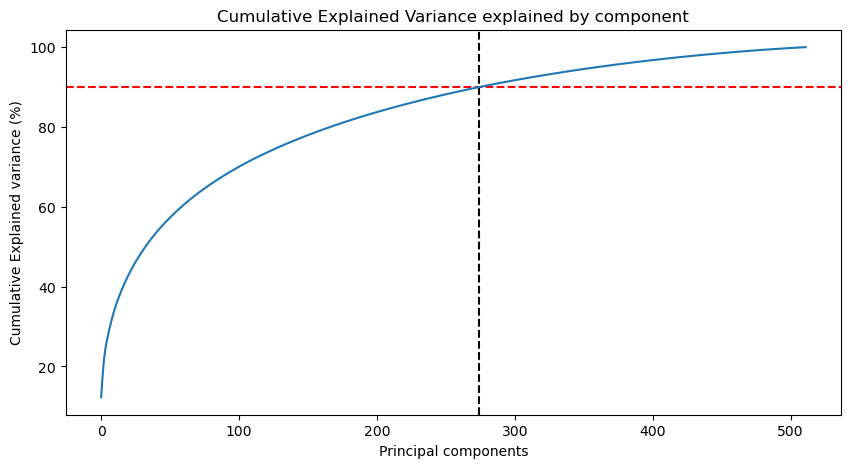

In [82]:
pca = PCA()
pca.fit(embedding_matrix_vgg16)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_vgg16 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_vgg16))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_vgg16, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [83]:
pca_vgg16 = PCA(n_components=274)
embedding_matrix_pcavgg16 = pca_vgg16.fit_transform(embedding_matrix_vgg16)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_vgg16_pca = pd.DataFrame({
    'id': df_embeddings_vgg16_1['id'],
    'embedding': embedding_matrix_pcavgg16.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_vgg16_pca.head())

    id                                          embedding
0  492  [-210.01505609149464, 40.05785962148209, -75.9...
1  496  [-232.90309610441284, 112.97455284692401, -104...
2    1  [273.2688811958168, 201.86798076336981, -233.1...
3    2  [62.21044611223454, 176.12673628460516, -78.06...
4    3  [24.507685778074386, 102.84983603950573, -134....


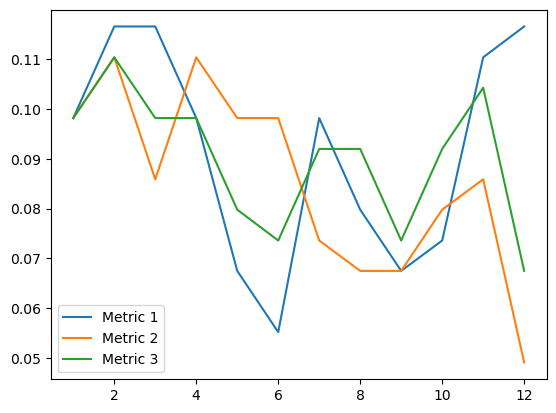

In [84]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [110]:
rec_cos_vgg16_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16_pca, n=2, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1166  Average Recall: 0.0654  Average F1-score: 0.0818
k=2:  Average Precision: 0.0583  Average Recall: 0.0654  Average F1-score: 0.0601
k=3:  Average Precision: 0.0838  Average Recall: 0.1329  Average F1-score: 0.1016
k=4:  Average Precision: 0.0629  Average Recall: 0.1329  Average F1-score: 0.0845
k=5:  Average Precision: 0.0577  Average Recall: 0.1513  Average F1-score: 0.0828
k=6:  Average Precision: 0.0481  Average Recall: 0.1513  Average F1-score: 0.0724
k=7:  Average Precision: 0.0508  Average Recall: 0.1851  Average F1-score: 0.0791
k=8:  Average Precision: 0.0445  Average Recall: 0.1851  Average F1-score: 0.0712
k=9:  Average Precision: 0.0470  Average Recall: 0.2209  Average F1-score: 0.0770
k=10:  Average Precision: 0.0429  Average Recall: 0.2270  Average F1-score: 0.0717


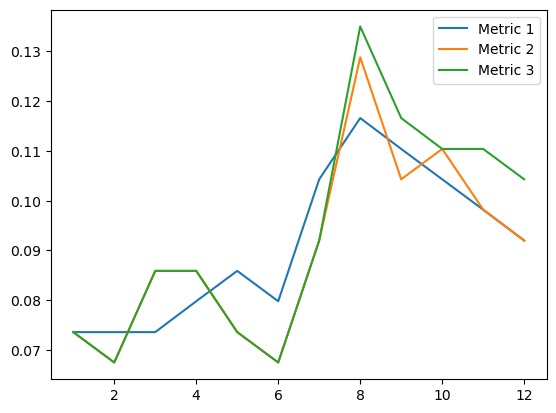

In [85]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [111]:
rec_eucl_vgg16_pca = rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16_pca, n=8, metric=3, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1350  Average Recall: 0.0695  Average F1-score: 0.0910
k=2:  Average Precision: 0.1104  Average Recall: 0.1115  Average F1-score: 0.1094
k=3:  Average Precision: 0.1043  Average Recall: 0.1564  Average F1-score: 0.1239
k=4:  Average Precision: 0.0936  Average Recall: 0.1902  Average F1-score: 0.1242
k=5:  Average Precision: 0.0871  Average Recall: 0.2229  Average F1-score: 0.1241
k=6:  Average Precision: 0.0818  Average Recall: 0.2566  Average F1-score: 0.1228
k=7:  Average Precision: 0.0745  Average Recall: 0.2751  Average F1-score: 0.1161
k=8:  Average Precision: 0.0759  Average Recall: 0.3241  Average F1-score: 0.1219
k=9:  Average Precision: 0.0757  Average Recall: 0.3609  Average F1-score: 0.1240
k=10:  Average Precision: 0.0742  Average Recall: 0.3937  Average F1-score: 0.1239


## PCA vgg19

Number of components explaining 95% variance: 273


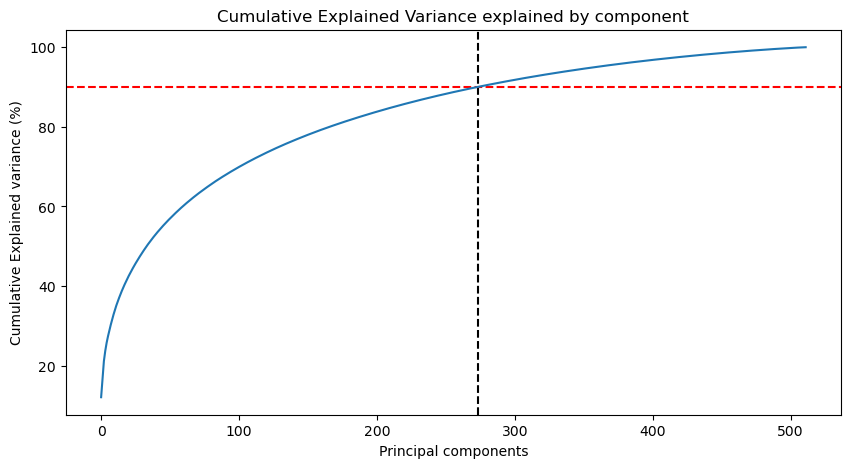

In [86]:
pca = PCA()
pca.fit(embedding_matrix_vgg19)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_vgg19 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_vgg19))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_vgg19, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [87]:
pca_vgg19 = PCA(n_components=pcs_90_vgg19)
embedding_matrix_pca_vgg19 = pca_vgg19.fit_transform(embedding_matrix_vgg19)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_vgg19_pca = pd.DataFrame({
    'id': df_embeddings_vgg19_1['id'],
    'embedding': embedding_matrix_pca_vgg19.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_vgg19_pca.head())

    id                                          embedding
0  492  [-255.8637293542219, 59.89856035937672, -42.32...
1  496  [-214.14050960178014, 94.98221630181861, -39.2...
2    1  [190.83586166943445, 241.70941757730506, -164....
3    2  [53.25222088954791, 173.44059776204472, -52.87...
4    3  [-1.2292666638689174, 114.60215952339921, -44....


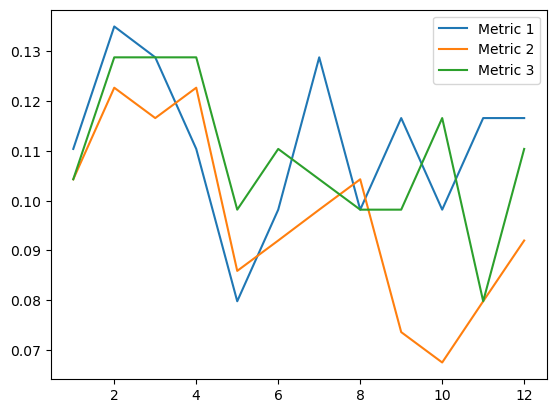

In [88]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [115]:
rec_cos_vgg19_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19_pca, n=2, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg19_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1350  Average Recall: 0.0746  Average F1-score: 0.0941
k=2:  Average Precision: 0.0675  Average Recall: 0.0746  Average F1-score: 0.0693
k=3:  Average Precision: 0.0757  Average Recall: 0.1207  Average F1-score: 0.0918
k=4:  Average Precision: 0.0567  Average Recall: 0.1207  Average F1-score: 0.0763
k=5:  Average Precision: 0.0552  Average Recall: 0.1472  Average F1-score: 0.0794
k=6:  Average Precision: 0.0470  Average Recall: 0.1534  Average F1-score: 0.0711
k=7:  Average Precision: 0.0491  Average Recall: 0.1861  Average F1-score: 0.0768
k=8:  Average Precision: 0.0429  Average Recall: 0.1861  Average F1-score: 0.0691
k=9:  Average Precision: 0.0477  Average Recall: 0.2403  Average F1-score: 0.0787
k=10:  Average Precision: 0.0429  Average Recall: 0.2403  Average F1-score: 0.0721


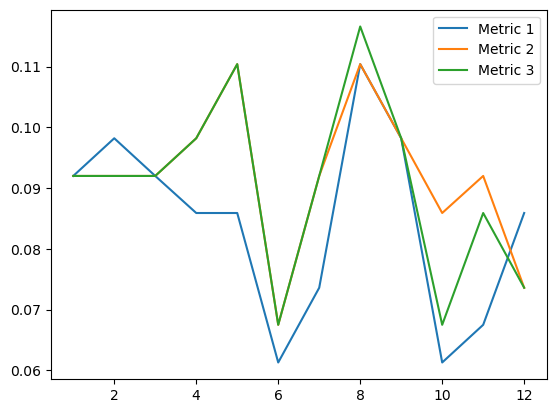

In [89]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg19_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [114]:
rec_cos_vgg19_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg19_pca, n=8, metric=3, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg19_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1166  Average Recall: 0.0665  Average F1-score: 0.0828
k=2:  Average Precision: 0.0951  Average Recall: 0.1043  Average F1-score: 0.0973
k=3:  Average Precision: 0.0920  Average Recall: 0.1483  Average F1-score: 0.1115
k=4:  Average Precision: 0.0828  Average Recall: 0.1759  Average F1-score: 0.1110
k=5:  Average Precision: 0.0847  Average Recall: 0.2219  Average F1-score: 0.1209
k=6:  Average Precision: 0.0757  Average Recall: 0.2372  Average F1-score: 0.1134
k=7:  Average Precision: 0.0762  Average Recall: 0.2853  Average F1-score: 0.1189
k=8:  Average Precision: 0.0744  Average Recall: 0.3211  Average F1-score: 0.1194
k=9:  Average Precision: 0.0716  Average Recall: 0.3507  Average F1-score: 0.1175
k=10:  Average Precision: 0.0724  Average Recall: 0.3926  Average F1-score: 0.1210


## PCA ResNet50

Number of components explaining 95% variance: 632


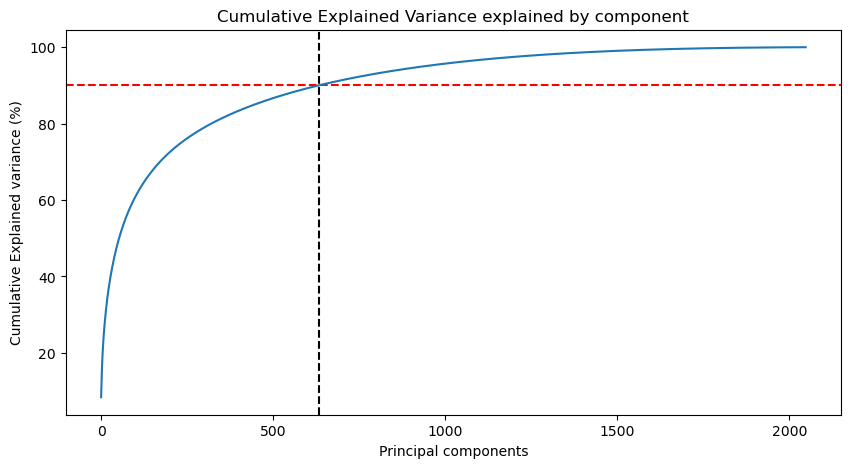

In [90]:
pca = PCA()
pca.fit(embedding_matrix_resnet50)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet50 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet50))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet50, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [91]:
pca_resnet50 = PCA(n_components=pcs_90_resnet50)
embedding_matrix_pca_resnet50 = pca_resnet50.fit_transform(embedding_matrix_resnet50)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet50_pca = pd.DataFrame({
    'id': df_embeddings_resnet50_1['id'],
    'embedding': embedding_matrix_pca_resnet50.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet50_pca.head())

    id                                          embedding
0  492  [-97.5766470702897, 0.721200111845492, 23.8491...
1  496  [-95.61248032773479, 7.617688870647389, 17.834...
2    1  [-26.38847543208219, 1.4605105003436383, 71.51...
3    2  [-14.48241598242242, 19.23958752285432, 73.672...
4    3  [-49.55825600766765, 25.077221293347648, 26.43...


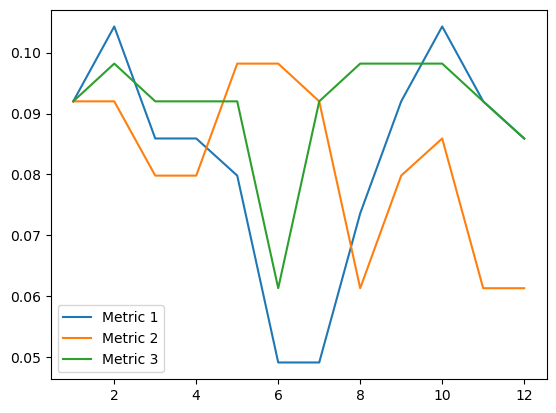

In [92]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [117]:
rec_cos_resnet50_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_pca, n=2, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1043  Average Recall: 0.0501  Average F1-score: 0.0675
k=2:  Average Precision: 0.0521  Average Recall: 0.0501  Average F1-score: 0.0509
k=3:  Average Precision: 0.0552  Average Recall: 0.0798  Average F1-score: 0.0650
k=4:  Average Precision: 0.0414  Average Recall: 0.0798  Average F1-score: 0.0543
k=5:  Average Precision: 0.0577  Average Recall: 0.1585  Average F1-score: 0.0833
k=6:  Average Precision: 0.0481  Average Recall: 0.1585  Average F1-score: 0.0727
k=7:  Average Precision: 0.0508  Average Recall: 0.1912  Average F1-score: 0.0794
k=8:  Average Precision: 0.0445  Average Recall: 0.1912  Average F1-score: 0.0714
k=9:  Average Precision: 0.0552  Average Recall: 0.2679  Average F1-score: 0.0906
k=10:  Average Precision: 0.0497  Average Recall: 0.2679  Average F1-score: 0.0830


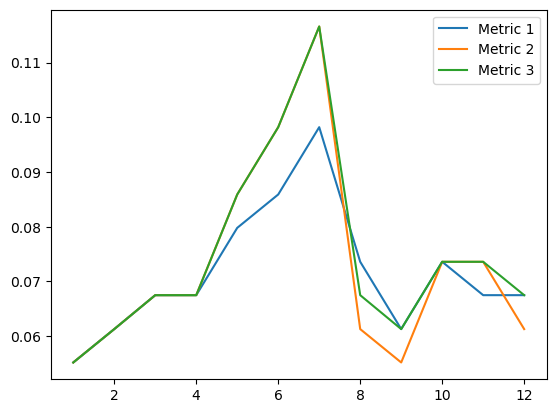

In [119]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50_pca ,n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [120]:
rec_cos_resnet50_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50_pca, n=7, metric=3, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1166  Average Recall: 0.0603  Average F1-score: 0.0787
k=2:  Average Precision: 0.0920  Average Recall: 0.0910  Average F1-score: 0.0906
k=3:  Average Precision: 0.0961  Average Recall: 0.1483  Average F1-score: 0.1151
k=4:  Average Precision: 0.0813  Average Recall: 0.1697  Average F1-score: 0.1086
k=5:  Average Precision: 0.0798  Average Recall: 0.2055  Average F1-score: 0.1138
k=6:  Average Precision: 0.0787  Average Recall: 0.2464  Average F1-score: 0.1180
k=7:  Average Precision: 0.0745  Average Recall: 0.2771  Average F1-score: 0.1162
k=8:  Average Precision: 0.0752  Average Recall: 0.3211  Average F1-score: 0.1205
k=9:  Average Precision: 0.0750  Average Recall: 0.3609  Average F1-score: 0.1230
k=10:  Average Precision: 0.0767  Average Recall: 0.4059  Average F1-score: 0.1278


## PCA ResNet101

Number of components explaining 95% variance: 618


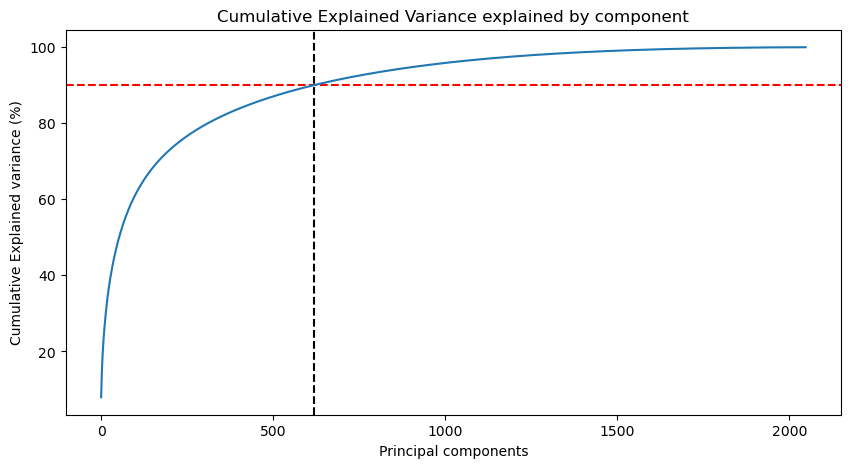

In [94]:
pca = PCA()
pca.fit(embedding_matrix_resnet101)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet101 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet101))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet101, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [95]:
pca_resnet101 = PCA(n_components=pcs_90_resnet101)
embedding_matrix_pca_resnet101 = pca_resnet101.fit_transform(embedding_matrix_resnet101)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet101_pca = pd.DataFrame({
    'id': df_embeddings_resnet101_1['id'],
    'embedding': embedding_matrix_pca_resnet101.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet101_pca.head())

    id                                          embedding
0  492  [-92.23938489314867, 1.1547169463378906, 22.64...
1  496  [-95.00606283963361, 11.197081587322707, 22.71...
2    1  [-22.447440769290683, -13.053030883647489, 92....
3    2  [22.129170237615902, -0.6674076800022808, 122....
4    3  [-51.90136870185626, -35.84579290035071, 43.24...


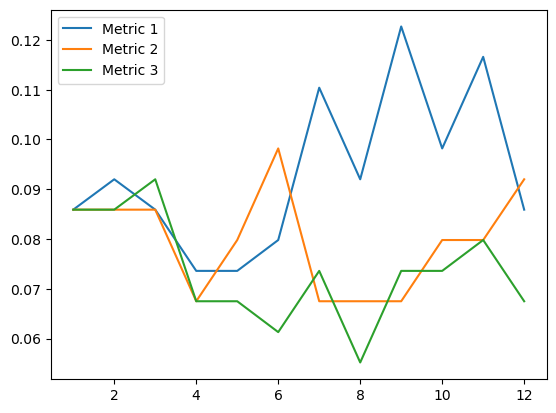

In [96]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [121]:
rec_cos_resnet101_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_pca, n=9, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1227  Average Recall: 0.0644  Average F1-score: 0.0828
k=2:  Average Precision: 0.0675  Average Recall: 0.0736  Average F1-score: 0.0687
k=3:  Average Precision: 0.0654  Average Recall: 0.1063  Average F1-score: 0.0793
k=4:  Average Precision: 0.0521  Average Recall: 0.1125  Average F1-score: 0.0700
k=5:  Average Precision: 0.0613  Average Recall: 0.1728  Average F1-score: 0.0889
k=6:  Average Precision: 0.0542  Average Recall: 0.1851  Average F1-score: 0.0824
k=7:  Average Precision: 0.0552  Average Recall: 0.2198  Average F1-score: 0.0868
k=8:  Average Precision: 0.0491  Average Recall: 0.2229  Average F1-score: 0.0792
k=9:  Average Precision: 0.0573  Average Recall: 0.2843  Average F1-score: 0.0941
k=10:  Average Precision: 0.0528  Average Recall: 0.2935  Average F1-score: 0.0884


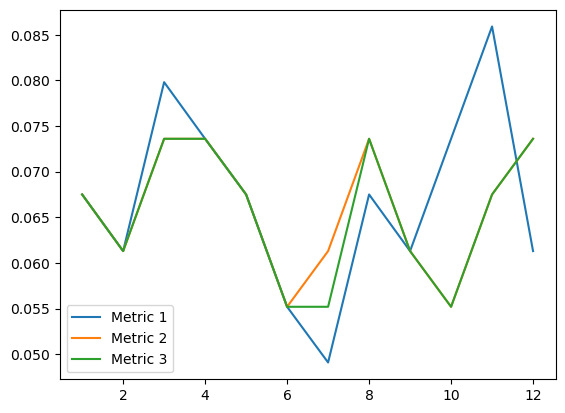

In [97]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [123]:
rec_cos_resnet101_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_pca, n=11, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0859  Average Recall: 0.0470  Average F1-score: 0.0593
k=2:  Average Precision: 0.0890  Average Recall: 0.0992  Average F1-score: 0.0918
k=3:  Average Precision: 0.0736  Average Recall: 0.1196  Average F1-score: 0.0896
k=4:  Average Precision: 0.0798  Average Recall: 0.1738  Average F1-score: 0.1076
k=5:  Average Precision: 0.0748  Average Recall: 0.1994  Average F1-score: 0.1074
k=6:  Average Precision: 0.0767  Average Recall: 0.2505  Average F1-score: 0.1158
k=7:  Average Precision: 0.0754  Average Recall: 0.2914  Average F1-score: 0.1181
k=8:  Average Precision: 0.0752  Average Recall: 0.3313  Average F1-score: 0.1210
k=9:  Average Precision: 0.0750  Average Recall: 0.3722  Average F1-score: 0.1234
k=10:  Average Precision: 0.0779  Average Recall: 0.4294  Average F1-score: 0.1304


## PCA ResNet152

Number of components explaining 95% variance: 616


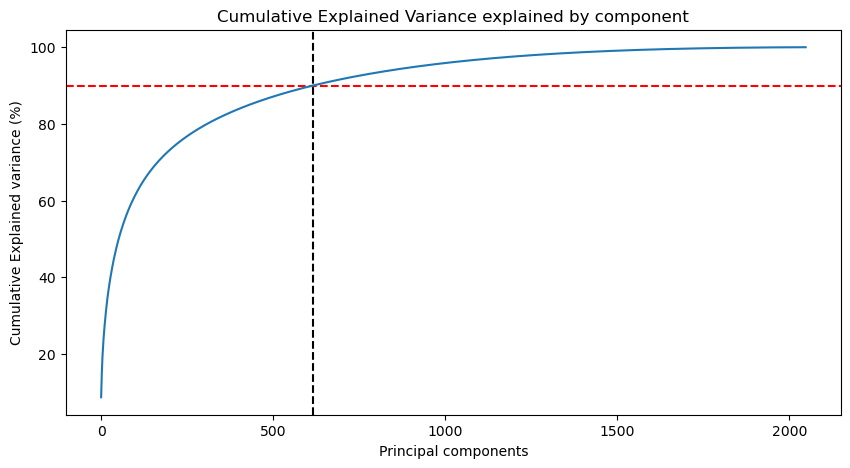

In [98]:
pca = PCA()
pca.fit(embedding_matrix_resnet152)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet152 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet152))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet152, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [99]:
pca_resnet152 = PCA(n_components=pcs_90_resnet152)
embedding_matrix_pca_resnet152 = pca_resnet152.fit_transform(embedding_matrix_resnet152)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet152_pca = pd.DataFrame({
    'id': df_embeddings_resnet152_1['id'],
    'embedding': embedding_matrix_pca_resnet152.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet152_pca.head())

    id                                          embedding
0  492  [-89.22814832579358, -4.818421279459461, 22.17...
1  496  [-92.5805678562489, 4.827474152431214, 70.9675...
2    1  [-34.82031035350616, -12.783879561917894, -18....
3    2  [-9.020730185289368, -10.798701439543349, 15.2...
4    3  [-70.2139508414229, -55.37980625379508, -27.99...


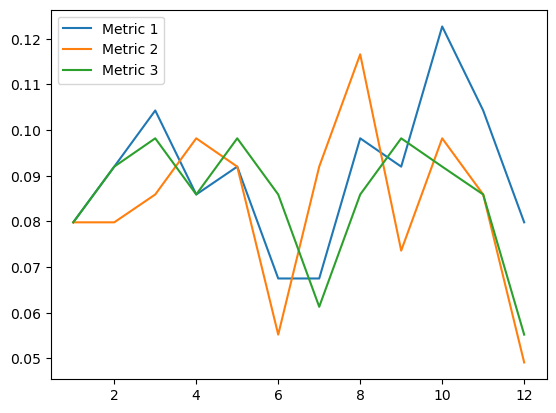

In [100]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [124]:
rec_cos_resnet152_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_pca, n=11, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1043  Average Recall: 0.0562  Average F1-score: 0.0716
k=2:  Average Precision: 0.0613  Average Recall: 0.0654  Average F1-score: 0.0622
k=3:  Average Precision: 0.0736  Average Recall: 0.1166  Average F1-score: 0.0883
k=4:  Average Precision: 0.0598  Average Recall: 0.1258  Average F1-score: 0.0796
k=5:  Average Precision: 0.0601  Average Recall: 0.1656  Average F1-score: 0.0866
k=6:  Average Precision: 0.0552  Average Recall: 0.1810  Average F1-score: 0.0833
k=7:  Average Precision: 0.0517  Average Recall: 0.2025  Average F1-score: 0.0812
k=8:  Average Precision: 0.0475  Average Recall: 0.2117  Average F1-score: 0.0766
k=9:  Average Precision: 0.0525  Average Recall: 0.2618  Average F1-score: 0.0864
k=10:  Average Precision: 0.0497  Average Recall: 0.2802  Average F1-score: 0.0834


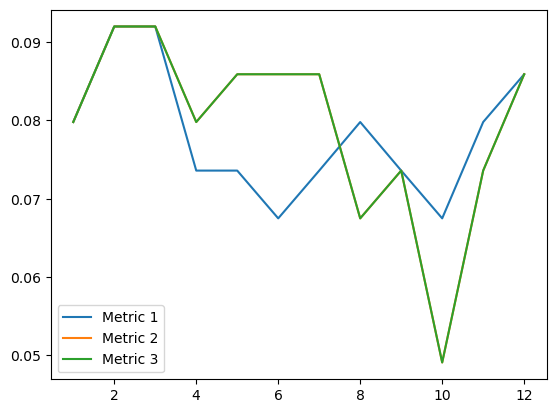

In [101]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [125]:
rec_cos_resnet152_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_pca, n=2, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0920  Average Recall: 0.0481  Average F1-score: 0.0624
k=2:  Average Precision: 0.0828  Average Recall: 0.0828  Average F1-score: 0.0820
k=3:  Average Precision: 0.0777  Average Recall: 0.1227  Average F1-score: 0.0939
k=4:  Average Precision: 0.0767  Average Recall: 0.1667  Average F1-score: 0.1032
k=5:  Average Precision: 0.0712  Average Recall: 0.1922  Average F1-score: 0.1022
k=6:  Average Precision: 0.0716  Average Recall: 0.2352  Average F1-score: 0.1081
k=7:  Average Precision: 0.0675  Average Recall: 0.2587  Average F1-score: 0.1056
k=8:  Average Precision: 0.0713  Average Recall: 0.3139  Average F1-score: 0.1149
k=9:  Average Precision: 0.0688  Average Recall: 0.3384  Average F1-score: 0.1133
k=10:  Average Precision: 0.0718  Average Recall: 0.3885  Average F1-score: 0.1201


## PCA InceptionV3

Number of components explaining 95% variance: 569


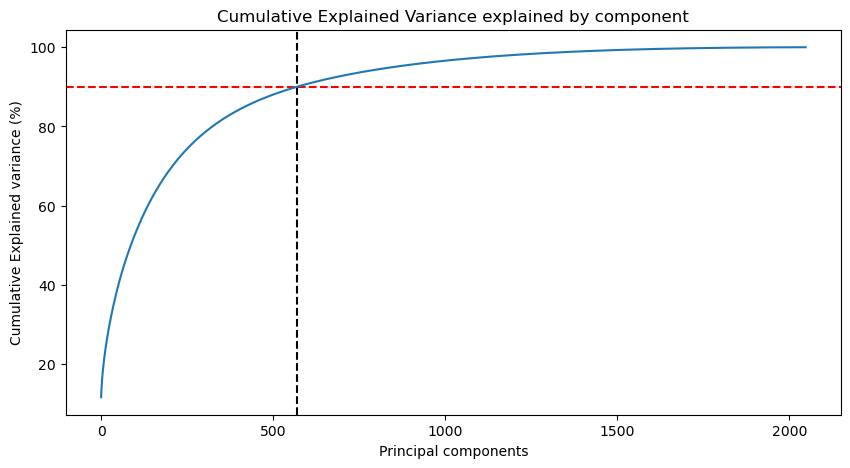

In [102]:
pca = PCA()
pca.fit(embedding_matrix_inceptionv3)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_inceptionv3 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_inceptionv3))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_inceptionv3, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [103]:
pca_inceptionv3 = PCA(n_components=pcs_90_inceptionv3)
embedding_matrix_pca_inceptionv3 = pca_inceptionv3.fit_transform(embedding_matrix_inceptionv3)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_inceptionv3_pca = pd.DataFrame({
    'id': df_embeddings_inceptionv3_1['id'],
    'embedding': embedding_matrix_pca_inceptionv3.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_inceptionv3_pca.head())

    id                                          embedding
0  492  [-40.669334297544026, 9.408870947688161, 0.358...
1  496  [-14.150463782723099, 12.27528731859967, -4.55...
2    1  [-10.828993532986877, 5.08301256500212, 3.4544...
3    2  [-9.276072942867765, -12.403176337494417, 0.51...
4    3  [-28.569118351486534, -6.784322755545685, 4.30...


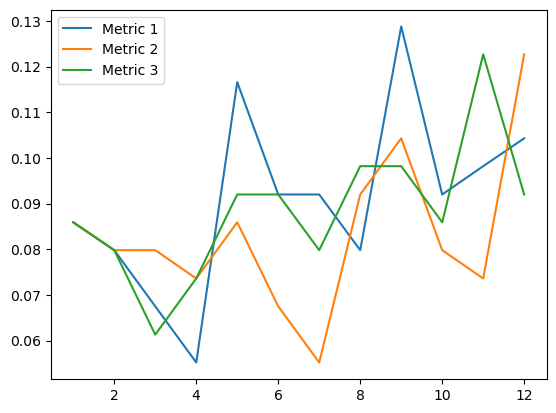

In [104]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [127]:
rec_cos_ineptionv3_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_pca, n=9, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_ineptionv3_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1288  Average Recall: 0.0675  Average F1-score: 0.0869
k=2:  Average Precision: 0.0706  Average Recall: 0.0736  Average F1-score: 0.0708
k=3:  Average Precision: 0.0634  Average Recall: 0.0971  Average F1-score: 0.0757
k=4:  Average Precision: 0.0491  Average Recall: 0.1002  Average F1-score: 0.0651
k=5:  Average Precision: 0.0528  Average Recall: 0.1360  Average F1-score: 0.0752
k=6:  Average Precision: 0.0450  Average Recall: 0.1391  Average F1-score: 0.0673
k=7:  Average Precision: 0.0465  Average Recall: 0.1687  Average F1-score: 0.0721
k=8:  Average Precision: 0.0445  Average Recall: 0.1902  Average F1-score: 0.0713
k=9:  Average Precision: 0.0450  Average Recall: 0.2137  Average F1-score: 0.0736
k=10:  Average Precision: 0.0405  Average Recall: 0.2137  Average F1-score: 0.0675


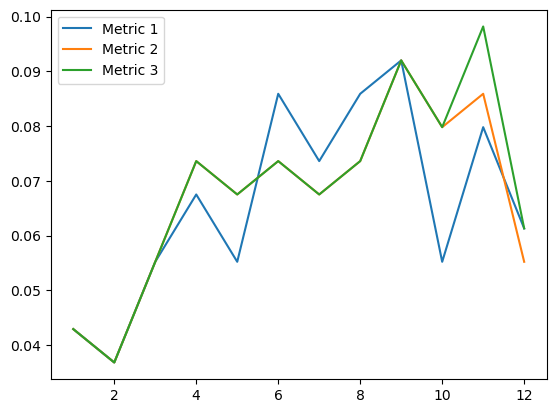

In [105]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [128]:
rec_cos_ineptionv3_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_pca, n=11, metric=3, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_ineptionv3_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0982  Average Recall: 0.0542  Average F1-score: 0.0685
k=2:  Average Precision: 0.0798  Average Recall: 0.0890  Average F1-score: 0.0820
k=3:  Average Precision: 0.0716  Average Recall: 0.1166  Average F1-score: 0.0871
k=4:  Average Precision: 0.0828  Average Recall: 0.1789  Average F1-score: 0.1114
k=5:  Average Precision: 0.0920  Average Recall: 0.2485  Average F1-score: 0.1321
k=6:  Average Precision: 0.0849  Average Recall: 0.2730  Average F1-score: 0.1277
k=7:  Average Precision: 0.0806  Average Recall: 0.2975  Average F1-score: 0.1253
k=8:  Average Precision: 0.0790  Average Recall: 0.3395  Average F1-score: 0.1266
k=9:  Average Precision: 0.0777  Average Recall: 0.3773  Average F1-score: 0.1273
k=10:  Average Precision: 0.0779  Average Recall: 0.4284  Average F1-score: 0.1303


## PCA Xcpetion

Number of components explaining 95% variance: 581


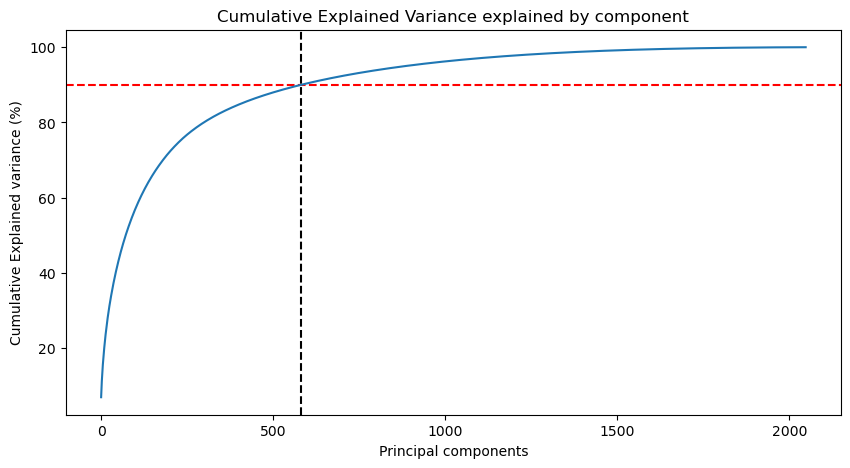

In [106]:
pca = PCA()
pca.fit(embedding_matrix_xception)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_xception = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_xception))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_xception, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [107]:
pca_xception = PCA(n_components=pcs_90_xception)
embedding_matrix_pca_xception = pca_xception.fit_transform(embedding_matrix_xception)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_xception_pca = pd.DataFrame({
    'id': df_embeddings_xception_1['id'],
    'embedding': embedding_matrix_pca_xception.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_xception_pca.head())

    id                                          embedding
0  492  [-16.771816134115966, 9.25103422234047, 0.2857...
1  496  [-9.261021459902333, 1.283432728486591, 4.0583...
2    1  [-5.7722185510502175, -3.2222955273020135, -0....
3    2  [-11.804225908909231, -7.372868835661331, -0.4...
4    3  [-15.399676279011395, -8.673341427544843, 0.06...


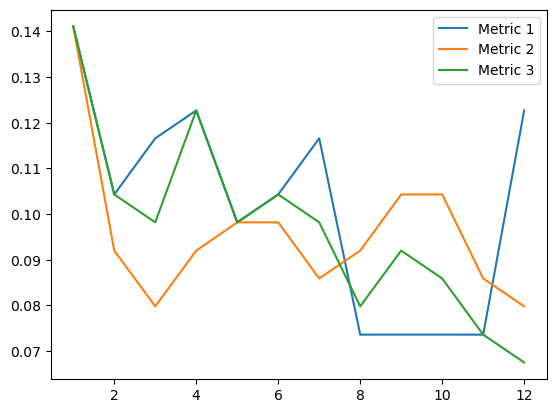

In [108]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [130]:
rec_cos_xception_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_pca, n=1, metric=1, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_xception_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1411  Average Recall: 0.0726  Average F1-score: 0.0951
k=2:  Average Precision: 0.0706  Average Recall: 0.0726  Average F1-score: 0.0710
k=3:  Average Precision: 0.0777  Average Recall: 0.1227  Average F1-score: 0.0939
k=4:  Average Precision: 0.0598  Average Recall: 0.1258  Average F1-score: 0.0801
k=5:  Average Precision: 0.0626  Average Recall: 0.1636  Average F1-score: 0.0895
k=6:  Average Precision: 0.0521  Average Recall: 0.1636  Average F1-score: 0.0782
k=7:  Average Precision: 0.0578  Average Recall: 0.2229  Average F1-score: 0.0906
k=8:  Average Precision: 0.0506  Average Recall: 0.2229  Average F1-score: 0.0814
k=9:  Average Precision: 0.0504  Average Recall: 0.2495  Average F1-score: 0.0829
k=10:  Average Precision: 0.0454  Average Recall: 0.2495  Average F1-score: 0.0760


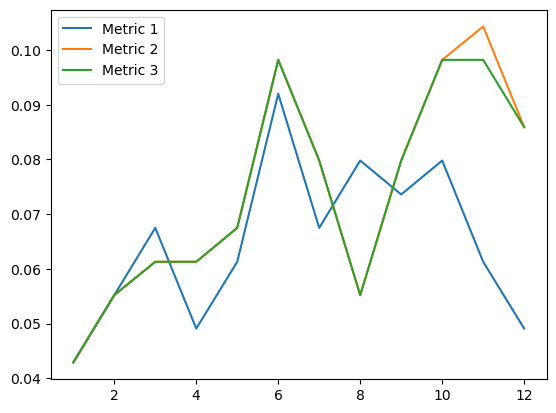

In [109]:
for metric in range(1,4):
    precision_top1_cos_vgg16 = []
    for n in range(1, 13):
        rec_cos_vgg16 = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_pca, n, metric, random_items_dict=random_items_dict)
        ks = [1]
        precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16, testset, ks=ks)
        avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
        precision_top1_cos_vgg16.append(avg_precisions.get(1))
    plt.plot(range(1,13), precision_top1_cos_vgg16,label="Metric " + str(metric))

#print(precision_top1_cos_vgg16)
plt.legend()
plt.show()

In [131]:
rec_cos_xception_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_pca, n=11, metric=2, random_items_dict=random_items_dict)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_xception_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.1043  Average Recall: 0.0532  Average F1-score: 0.0695
k=2:  Average Precision: 0.0920  Average Recall: 0.1012  Average F1-score: 0.0943
k=3:  Average Precision: 0.0838  Average Recall: 0.1442  Average F1-score: 0.1037
k=4:  Average Precision: 0.0798  Average Recall: 0.1769  Average F1-score: 0.1080
k=5:  Average Precision: 0.0798  Average Recall: 0.2157  Average F1-score: 0.1149
k=6:  Average Precision: 0.0736  Average Recall: 0.2362  Average F1-score: 0.1109
k=7:  Average Precision: 0.0754  Average Recall: 0.2812  Average F1-score: 0.1177
k=8:  Average Precision: 0.0744  Average Recall: 0.3200  Average F1-score: 0.1195
k=9:  Average Precision: 0.0750  Average Recall: 0.3640  Average F1-score: 0.1231
k=10:  Average Precision: 0.0748  Average Recall: 0.4070  Average F1-score: 0.1253
